In [1]:
import numpy as np
import plotly.graph_objects as go

In [2]:
x = np.linspace(0, 1)
y = np.linspace(0, 1)
x_mesh, y_mesh = np.meshgrid(x, y)

In [32]:
z = x_mesh + y_mesh
# z = x_mesh**2 + y_mesh**0.5
# z = x_mesh - y_mesh

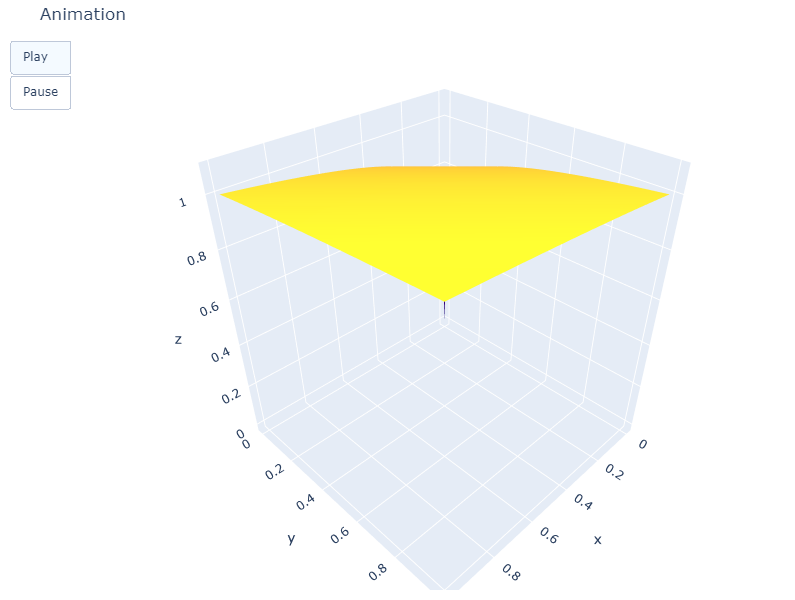

In [33]:
# Make frames for animation
n_frames = 10
frames = [None] * n_frames
for f in range(n_frames):
    frames[f] = go.Frame(
        data = go.Surface(x=x, y=y, z=np.exp(z * 0.01 * (f + 1))),
        layout = go.Layout(dict(title="Animation"))
    )

# Buttons for animation
play_but = dict(label="Play", method="animate", 
                args=[None, {"transition": {"duration": 300}}])
pause_but = dict(label="Pause", method="animate",
                 args=[None, {"frame": {"duration": 0, "redraw": False},
                              "mode": "immediate", 
                              "transition": {"duration": 0}}]) 

# Make animated interactive 3D scatter plot
fig = go.Figure(
    data = go.Surface(x=x, y=y, z=z**0.1), 
    layout = go.Layout(
        width=900, height=600, margin = dict(l=10, r=10, t=40, b=10), 
        title="Animation",
#         scene=dict(
#           xaxis = dict(showspikes=False, range=[self.min_long, self.max_long]),
#           yaxis = dict(showspikes=False, range=[self.min_lat, self.max_lat]), 
#           zaxis = dict(showspikes=False, range=[0, np.max(self.y)])),
#         scene_camera=dict(eye=dict(x=0, y=-2.1, z=0.8)),
#         scene_aspectmode='manual', scene_aspectratio=dict(
#           x=np.cos(-np.pi / 180 * np.mean(x_star_lat)), y=1, z=0.7), 
        updatemenus=[dict(type="buttons", buttons=[play_but, pause_but])]
    ),
    frames = frames
)
fig.update_traces(hoverinfo='skip')
fig.update_traces(showscale=False, selector=dict(type="surface"))
fig.show()